In [5]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, Model, layers, initializers, regularizers, optimizers, metrics 

import os
import time
import shutil
import random 
import zipfile

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

from sklearn.metrics import confusion_matrix

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# Set the machine
gdrive = True
# Set the connection string
path = "/content/gdrive/MyDrive/DL_Project/"
main_folder, training_folder, validation_folder, testing_folder = "datasets/", "train/", "validation/", "test/"
# If using Google Drive
if gdrive:
    # Setup drive
    from google.colab import drive
    drive.mount('/content/gdrive')        
    # Transfer zip dataset to the current virtual machine
    t0 = time.time()
    shutil.copyfile(path + 'datasets.zip', 'datasets.zip')
    # Extract files
    zip_ = zipfile.ZipFile('datasets.zip')
    zip_.extractall()
    zip_.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    path = "/content/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
File transfer completed in 4.324 seconds


Custom 128

In [17]:
image_size256 = (128, 128)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42

In [18]:
ds_test = image_dataset_from_directory(path + main_folder + testing_folder, 
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                color_mode=color_mode,
                                                batch_size=batch_size,
                                                label_mode=label_mode,
                                                shuffle=shuffle,
                                                seed=seed)

Found 128 files belonging to 3 classes.


In [14]:
from tensorflow.keras.models import load_model
model = load_model("/content/gdrive/MyDrive/DL_Project/saved_models/Custom_128/")

In [15]:
model.summary()

Model: "CNN-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_augmentation_pipeline (S  (None, None, None, 3)    0         
 equential)                                                      
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 42, 42, 64)        3136      
                                                                 
 batch_normalization_9 (Batc  (None, 42, 42, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 42, 42, 64)        0         
                                                             

In [19]:
 prediction = model.predict(ds_test)

8/8 [==============================] - 1s 79ms/step


In [33]:
y_prediction = np.argmax (prediction, axis = 1)

In [ ]:
true = []
for images, labels_batch in ds_test:
    true += list(labels_batch.numpy())

In [40]:
y_test=np.argmax(true, axis=1)
y_test

array([0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0])

In [41]:
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

[[0.36956522 0.30952381 0.325     ]
 [0.32608696 0.33333333 0.35      ]
 [0.30434783 0.35714286 0.325     ]]


<Axes: >

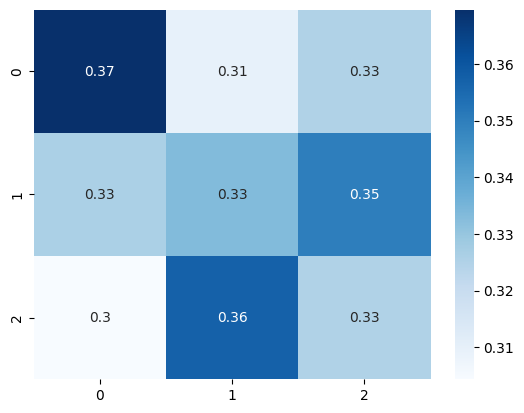

In [44]:
import seaborn as sea
from sklearn.metrics import confusion_matrix
sea.heatmap(result, annot=True, cmap = 'Blues')